In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pylab as rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

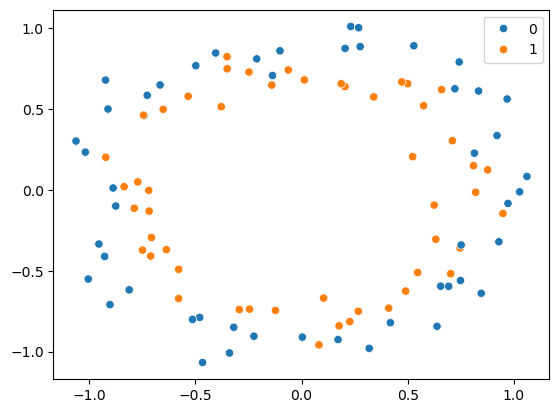

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
import time
start = time.time()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=1000, verbose=1) 
end = time.time()

Epoch 1/1000
3/3 [==============================] - 1s 94ms/step - loss: 0.6933 - accuracy: 0.4500 - val_loss: 0.6940 - val_accuracy: 0.4000
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6919 - accuracy: 0.5250 - val_loss: 0.6968 - val_accuracy: 0.4000
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6899 - accuracy: 0.5125 - val_loss: 0.6986 - val_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7010 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.6872 - accuracy: 0.5375 - val_loss: 0.7031 - val_accuracy: 0.4500
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6874 - accuracy: 0.5250 - val_loss: 0.7058 - val_accuracy: 0.4500
Epoch 7/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6858 - accuracy: 0.5625 - val_loss: 0.7074 - val_accuracy: 0.4500
Epoch 8/1000


In [8]:
training_time = start-end
abs(training_time)

37.85840702056885

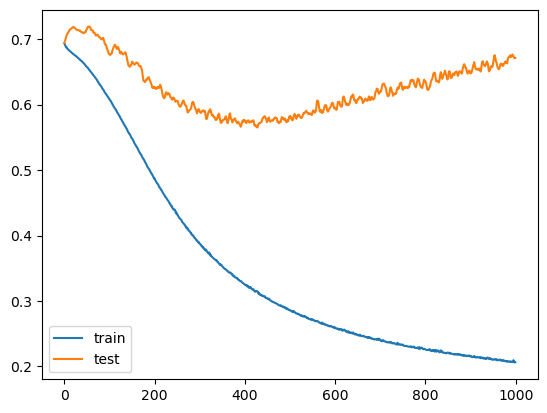

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 9s 889us/step


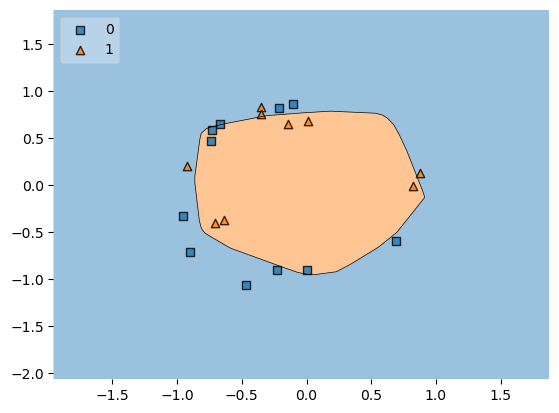

In [10]:
plot_decision_regions(x_test,y_test.ravel(), clf=model, legend=2)
plt.show()

In [11]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.000001,
    patience=30,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [21]:
start = time.time()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000,callbacks=callback)
end = time.time()
training_time = abs(start-end)
training_time

Epoch 1/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.6742 - accuracy: 0.5750 - val_loss: 0.7140 - val_accuracy: 0.4000
Epoch 2/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6736 - accuracy: 0.5750 - val_loss: 0.7146 - val_accuracy: 0.4000
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6731 - accuracy: 0.5750 - val_loss: 0.7147 - val_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6722 - accuracy: 0.5750 - val_loss: 0.7134 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6716 - accuracy: 0.5750 - val_loss: 0.7124 - val_accuracy: 0.4000
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.6709 - accuracy: 0.5750 - val_loss: 0.7115 - val_accuracy: 0.4000
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.6705 - accuracy: 0.6000 - val_loss: 0.7105 - val_accuracy: 0.4500
Epoch 8/1000


12.665356874465942

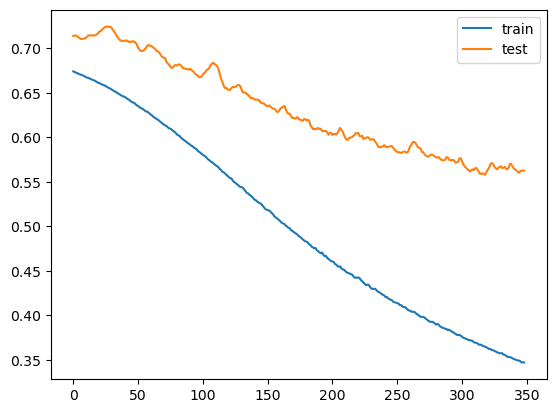

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()